# 1. Importing libraries and image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

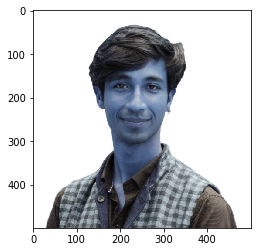

In [2]:
image = cv2.imread('images/profile_white_background.jpeg')
plt.imshow(image)

### Converting from BGR to RGB

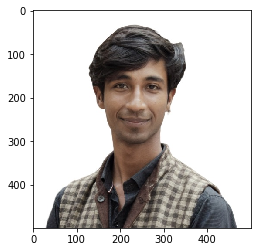

In [3]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

# 2. Defining threshold and mask

### Threshold

In [18]:
lower_white = np.array([220,220,220])   # gray (this is variable value according to image)
upper_white = np.array([255, 255, 255]) # white (this is variable value according to image)

### Mask

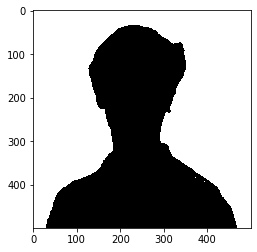

In [19]:
mask = cv2.inRange(image_copy, lower_white, upper_white)
plt.imshow(mask, cmap = "gray")
#plt.savefig('results/mask.png')

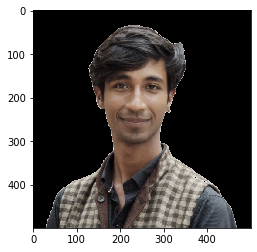

In [20]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0,0,0]      # will remove the area from original image where mask is white and assign it black
plt.imshow(masked_image)
#plt.savefig('results/mask_image.png')

# 3. Creating mask for background

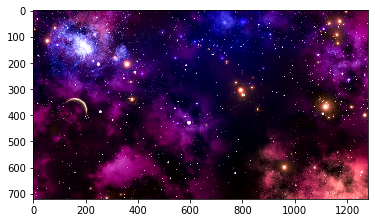

In [21]:
background_image = cv2.imread('images/space.jpg')
plt.imshow(background_image)

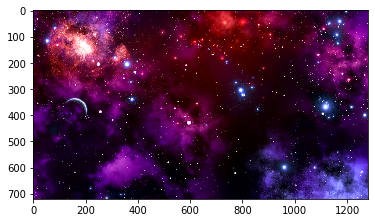

In [22]:
background_image= cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
plt.imshow(background_image)
#plt.savefig("results/space.jpg")

### Crop image background

In [23]:
print("The dimension of original image is ", image.shape)

The dimension of original image is  (500, 500, 3)


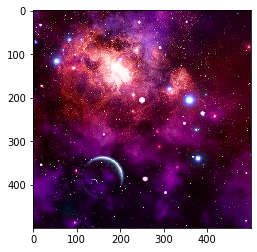

In [24]:
crop_background = np.copy(background_image[:500, 0:500])
plt.imshow(crop_background)

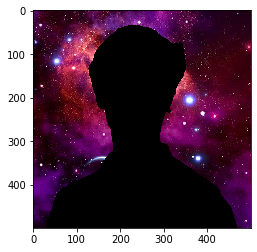

In [25]:
crop_background[mask == 0] = [0,0,0]   # turns black where the background was in original image
plt.imshow(crop_background)
#plt.savefig('results/masked_background.png')

# 4. Merge background and Profile images

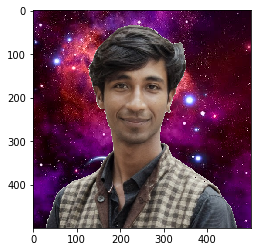

In [26]:
result_image = crop_background+masked_image
plt.imshow(result_image)
#plt.savefig("results/changed_background.png")

# 5. Plotting

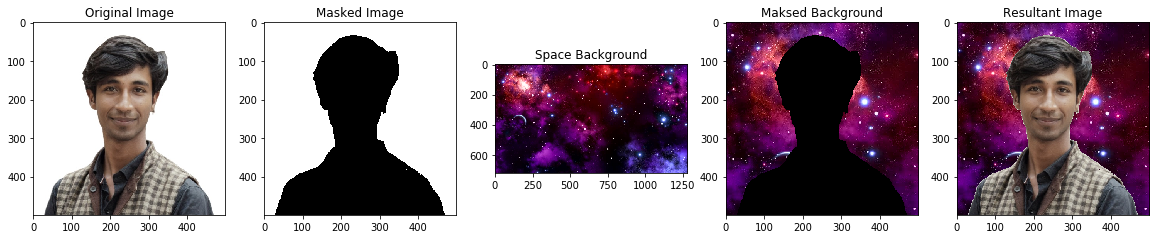

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,10))

ax1.set_title('Original Image')
ax1.imshow(image_copy)

ax2.set_title('Masked Image')
ax2.imshow(mask , cmap = 'gray')

ax3.set_title('Space Background')
ax3.imshow(background_image)

ax4.set_title('Maksed Background')
ax4.imshow(crop_background)

ax5.set_title('Resultant Image')
ax5.imshow(result_image)

fig.savefig('results/Changing_Background.png')

# Thank You!